# PELOTA QUE CAE
Las ecuaciones de newton son:
    $m \frac{d^2\vec r}{dt²}=-g \hat k + \vec f_{fricc}+\vec f_{ext}$
    
    
    
    

In [203]:
from pylab import*
from scipy.integrate import*
%matplotlib inline

In [204]:
def mi_funcion(a,b):
    c=a+b
    return c


In [205]:
b=mi_funcion(4,7)
c=mi_funcion(b,19)
print b,c

11 30


In [206]:

def fuerza(v_r,t,gama=0,viento=[0,0],m=1,g=9.8):
    # v_r=[ry,rz,vy,vz]
    dvz = -g/m-(gama/m)*v_r[3]+viento[1]
    dvy = -(gama/m)*v_r[2] + viento[0]
    drz = v_r[3]
    dry = v_r[2]
    return [dry,drz,dvy,dvz]

<function matplotlib.pyplot.show>

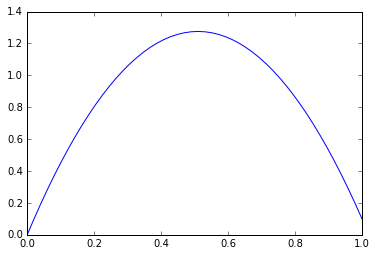

In [207]:
tiempo = linspace(0,1)
resultado = odeint(fuerza,[0,0,1,5],tiempo)
y,z,vy,vz =resultado[:,0],resultado[:,1],resultado[:,2],resultado[:,3]
plot(y,z)
show


<function matplotlib.pyplot.show>

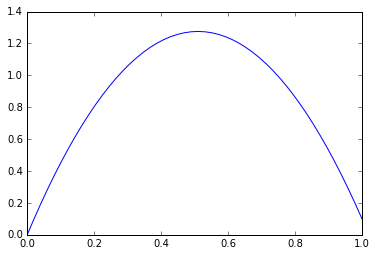

In [208]:
tiempo = linspace(0,1)
resultado = odeint(fuerza,[0,0,1,5],tiempo)
y,z,vy,vz =resultado[:,0],resultado[:,1],resultado[:,2],resultado[:,3]
plot(y,z)
show

In [209]:
salida=fuerza ([0,0,0,1],1)
print salida

[0, 1, 0, -9.8]


In [210]:
lista = [1,2,3,523,154,1646,13,354]
print lista
print lista[1:4]

[1, 2, 3, 523, 154, 1646, 13, 354]
[2, 3, 523]


In [211]:
print range (0,20,4)

[0, 4, 8, 12, 16]


In [212]:
def mi_funcion(a,b,c):
    d = a + b + c
    return d
print mi_funcion(3,0,0)

3


<function matplotlib.pyplot.show>

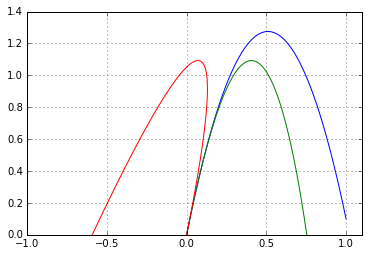

In [213]:
tiempo = linspace(0,1)
s_ideal= odeint(fuerza,[0,0,1,5],tiempo)
y_id,z_id =s_ideal[:,0],s_ideal[:,1]
s_fric= odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,))
y_f,z_f =s_fric[:,0],s_fric[:,1]
s_f_v= odeint(fuerza,[0,0,1,5],tiempo,args=(0.5,[-3.5,0]))
y_f_v,z_f_v=s_f_v[:,0],s_f_v[:,1]
plot(y_id,z_id,y_f,z_f,y_f_v,z_f_v)
xlim([-1,1.1]),ylim([0,1.4]),grid(True)
show

In [214]:
def funcion1(x,otra_funcion):
    salida=otra_funcion(x)+y
    return salida

def funcion2(x):
    salida=x**2
    return salida

def funcion3(x):
    salida=x**3
    return salida



In [215]:
print funcion2(4.)
print funcion3(4.)
print funcion1(5.,funcion3)

16.0
64.0
[ 125.          125.02040816  125.04081633  125.06122449  125.08163265
  125.10204082  125.12244898  125.14285714  125.16326531  125.18367347
  125.20408163  125.2244898   125.24489796  125.26530612  125.28571429
  125.30612245  125.32653061  125.34693878  125.36734694  125.3877551
  125.40816327  125.42857143  125.44897959  125.46938776  125.48979592
  125.51020408  125.53061224  125.55102041  125.57142857  125.59183673
  125.6122449   125.63265306  125.65306122  125.67346939  125.69387755
  125.71428571  125.73469388  125.75510204  125.7755102   125.79591837
  125.81632653  125.83673469  125.85714286  125.87755102  125.89795918
  125.91836735  125.93877551  125.95918367  125.97959184  126.        ]


In [216]:
a=range(2,10)
print a
print a[-1] #pone el ultimo

[2, 3, 4, 5, 6, 7, 8, 9]
9


In [217]:
def pedazo_trayectoria(pto_ini,dt=0.1,param=(0,[0,0],1,9.8)):
    tiempo = array([0,dt])
    sol=odeint(fuerza,pto_ini,tiempo,args=(param[0],param[1],param[2],param[3],))
    return sol
    
    


In [218]:
pedazo_trayectoria([0,0,1,1])

array([[ 0.   ,  0.   ,  1.   ,  1.   ],
       [ 0.1  ,  0.051,  1.   ,  0.02 ]])

In [219]:
def rebote(punto,dt,param):
    error=1e-5
    dt=dt/2
    sol=odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
    while abs(sol[:,1][0]-sol[:,1][1])>error:
        if sol[:,1][0]*sol[:,1][1]<0:  #si son negativos
            punto=sol[0]
        else:
            punto=sol[1]
        dt=dt/2
        sol=odeint(fuerza,punto,[0,dt],args=(param[0],param[1],param[2],param[3],))
        
    return sol[0][0],sol[0][1],sol[0][2],-sol[0][3]
            

In [220]:
def trayectoria(pto_ini,t_fin, param=(0,[0,0],1,9.8) ):
    t_total,dt=[0],0.05
    y=[pto_ini[0]]
    z=[pto_ini[1]]
    t_actual=0
    while t_actual<= t_fin: #se ejecuta hasta que termina
        t_actual=t_actual+dt  #para parar el tiempo
        sol = odeint(fuerza,pto_ini,[0,dt],args=(param[0],param[1],param[2],param[3],))#odeint es una lib de ecuaciones
        if sol[:,1][0]*sol[:,1][1]<0.:#print t_actual
            sol=rebote(sol[0],dt,param)
            y.append(sol[0])
            z.append(sol[1])
            pto_ini=sol
        else:
            y.append(sol[:,0][1])#pega lo {ultimo}
            z.append(sol[:,1][1])#pega lo {ultimo} los dos puntos indica que tome todos
            pto_ini=sol[1]
    return y,z

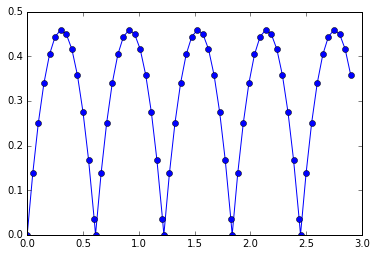

In [234]:
y,z=trayectoria([0,0,1,3],3)
plot (y,z,'o-') #'o'grafica con puntos y linea

In [226]:
rebote([0.6,0.036,1.,-2.88],0.05,[0,[0,0],1,9.8])

(0.61224365234374989, 3.7368311003308554e-06, 1.0, 2.9999877929687497)

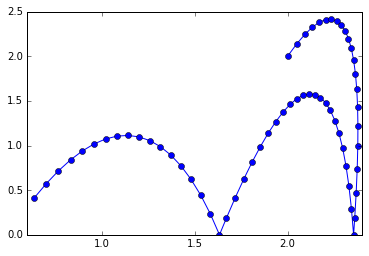

In [232]:
y,z=trayectoria([2,2,1,3],3,[0.5,[-1,0],1,9.8])
plot (y,z,'o-') #'o'grafica con puntos y linea

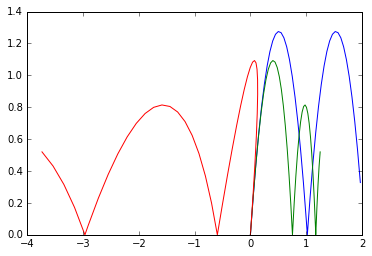

In [241]:
y_id,z_id=trayectoria([0,0,1,5],2)
y_f,z_f=trayectoria([0,0,1,5],2,[0.5,[0,0],1,9.8])
y_v,z_v=trayectoria([0,0,1,5],2,[0.5,[-3.5,0],1,9.8])
plot (y_id,z_id,y_f,z_f,y_v,z_v) #'o'grafica con puntos y linea